## Adjusted graphs with interpretations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
from datetime import datetime
from datetime import date

In [54]:
data = pd.read_csv("C:\\Users\\amaia\\Downloads\\ML project\\lung_cancer_mortality_data_large_v2.csv")

In [3]:
#converting to datetime
data["diagnosis_date"] = pd.to_datetime(data["diagnosis_date"], format = "%Y-%m-%d")
data["beginning_of_treatment_date"] = pd.to_datetime(data["beginning_of_treatment_date"], format = "%Y-%m-%d")
data["end_treatment_date"] = pd.to_datetime(data["end_treatment_date"], format = "%Y-%m-%d")

In [4]:
#calculating length of treatment

data["time_between_diganosis_and_treatment"] = data["beginning_of_treatment_date"] - data["diagnosis_date"]
data["treatment_length"] = data["end_treatment_date"] - data["beginning_of_treatment_date"] 
data["treatment_length"] = data["treatment_length"].astype("int64")

## Count plots

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype          
---  ------                                --------------  -----          
 0   id                                    1000 non-null   int64          
 1   age                                   1000 non-null   float64        
 2   gender                                1000 non-null   object         
 3   country                               1000 non-null   object         
 4   diagnosis_date                        1000 non-null   datetime64[ns] 
 5   cancer_stage                          1000 non-null   object         
 6   beginning_of_treatment_date           1000 non-null   datetime64[ns] 
 7   family_history                        1000 non-null   object         
 8   smoking_status                        1000 non-null   object         
 9   bmi                                   1000 non-null   float64   

In [6]:
plot_data = data

plot_data.rename(columns={'survived': 'Outcome'}, inplace=True)
plot_data.rename(columns={'cancer_stage': 'Cancer stage'}, inplace=True)
plot_data.rename(columns={'gender': 'Gender'}, inplace=True)
# Map the values in 'survival_status' to more descriptive labels
plot_data['Outcome'] = plot_data['Outcome'].map({0: 'Deceased', 1: 'Alive'})

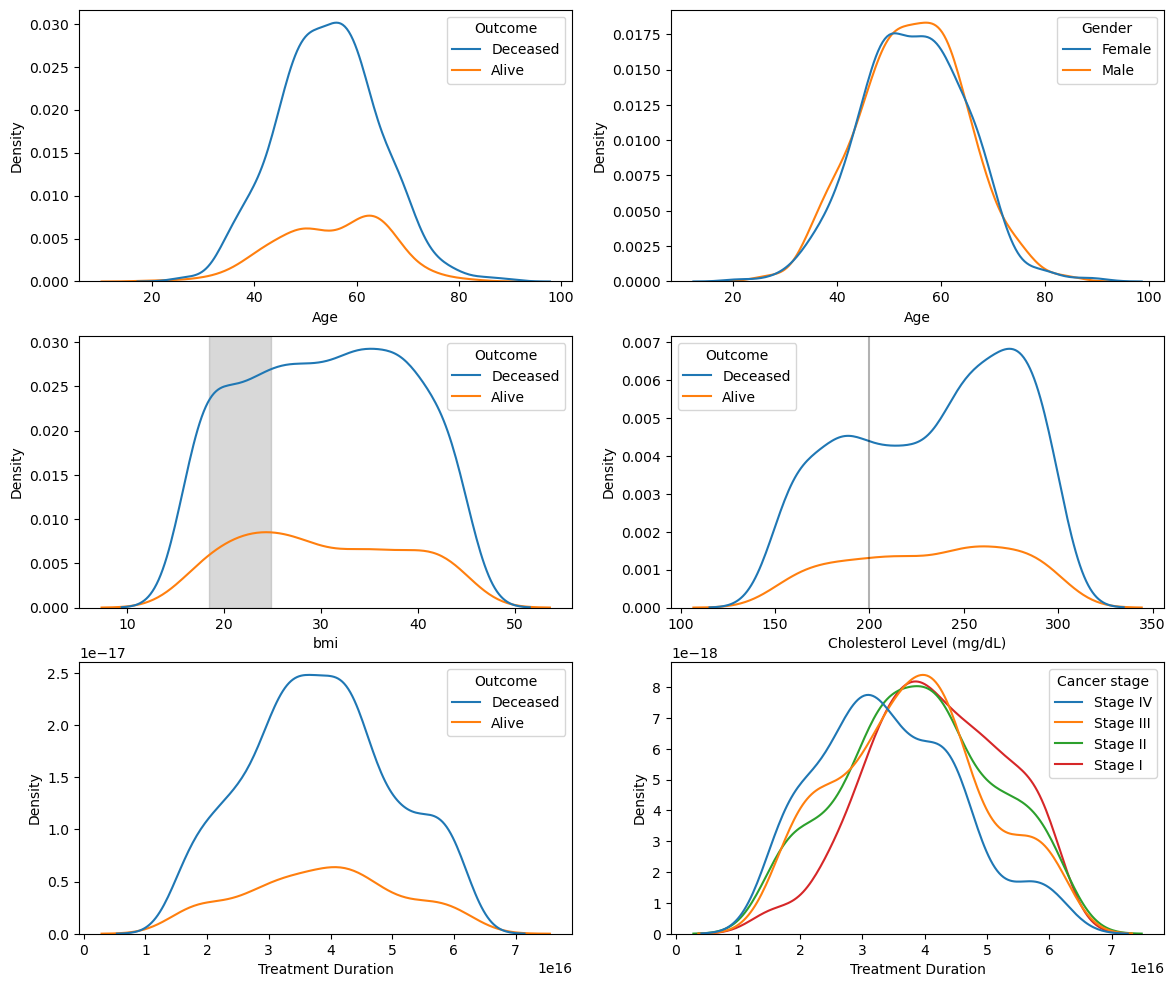

In [7]:
fig, axes = plt.subplots(ncols=2, nrows = 3, figsize=(14, 12))

#age plots
sns.kdeplot(plot_data, x="age", hue="Outcome", ax=axes[0,0])
sns.kdeplot(plot_data, x="age", hue= "Gender", ax=axes[0,1])
axes[0, 0].set_xlabel('Age')
axes[0, 1].set_xlabel('Age')
#bmi plot
sns.kdeplot(data, x="bmi", hue="Outcome", ax=axes[1,0])
#this rectangle shades in the normal bmi range so we can see who falls outside of it (https://www.nhs.uk/conditions/obesity/)
axes[1,0].axvspan(18.5, 24.9, alpha = 0.3, color='gray')

#cholesterol graph
sns.kdeplot(plot_data, x="cholesterol_level", hue="Outcome",  ax=axes[1,1])
axes[1, 1].set_xlabel('Cholesterol Level (mg/dL)')
#instead of adding i've put the line at 200 as past that is where high cholesterol starts (https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean)
axes[1,1].axvline(200,c= 'black', alpha = 0.3)

#treatment Length graph
sns.kdeplot(plot_data, x="treatment_length", hue="Outcome", ax=axes[2,0])
sns.kdeplot(plot_data, x="treatment_length", hue="Cancer stage", ax=axes[2,1])
axes[2, 0].set_xlabel('Treatment Duration')
axes[2, 1].set_xlabel('Treatment Duration')
plt.show()

### Age vs Survival 
- survivied and not survived have a similar distribution though survival has a few peaks at 50 and at 63-4
- the distribution of patients that did not survive is similar to that of the general distrbution of patients suggesting that age alone is not the reason for patient death
- the distribution of patients that surived seems to skew to the left suggesting a higher mortality rate at ages between 30-40
### Age vs Gender 
- equal distribution of men and women (no biased sampling)

### Bmi
- distributions are slightly inverse
- we can see the deaths have slightly higher proportion from 30-45
- survived patients show a slightly higher distribution within the healthy bmi range

### Cholesterol Levels
- for patients that did not survive two peaks can seen at between 150-200 as well as between 250-300. Considering that 200 is the threshold for normal cholesterol levels its interesting that there is a peak in mortality here. (the high peak between 250- 300 is more expected as these are dangerous levels for cholesterol) some literature seems to suggest that there is a reliationship between low cholesterol and lung cancer mortality (https://academic.oup.com/aje/article-abstract/121/6/870/92338))

## Treatment length vs survival
- no difference between distribution peaks suggests there isn't a massive relationship?


## Treatment length vs cancer stage
- here we see a similar distribution between all stages however there is a small right skew on stage 4 cancer, this suggests shorter treatment time however this could be caused by a higher proportion of premature patient death rather than end of treatment due to achieveing remission 

In [8]:
#cleaning data for plotting
plot_data.rename(columns={'hypertension': 'Hypertension'}, inplace=True)
plot_data.rename(columns={'asthma': 'Asthma'}, inplace=True)
plot_data.rename(columns={'cirrhosis': 'Cirrhosis'}, inplace=True)
plot_data.rename(columns={'other_cancer': 'Presence of other cancers'}, inplace=True)


In [9]:
# Map the values in 'survival_status' to more descriptive labels
plot_data['Hypertension'] = plot_data['Hypertension'].map({0: 'Absent', 1: 'Present'})
plot_data['Asthma'] = plot_data['Asthma'].map({0: 'Absent', 1: 'Present'})
plot_data['Presence of other cancers'] = plot_data['Presence of other cancers'].map({0: 'Absent', 1: 'Present'})
plot_data["Cirrhosis"] = plot_data["Cirrhosis"].map({0: 'Absent', 1: 'Present'})

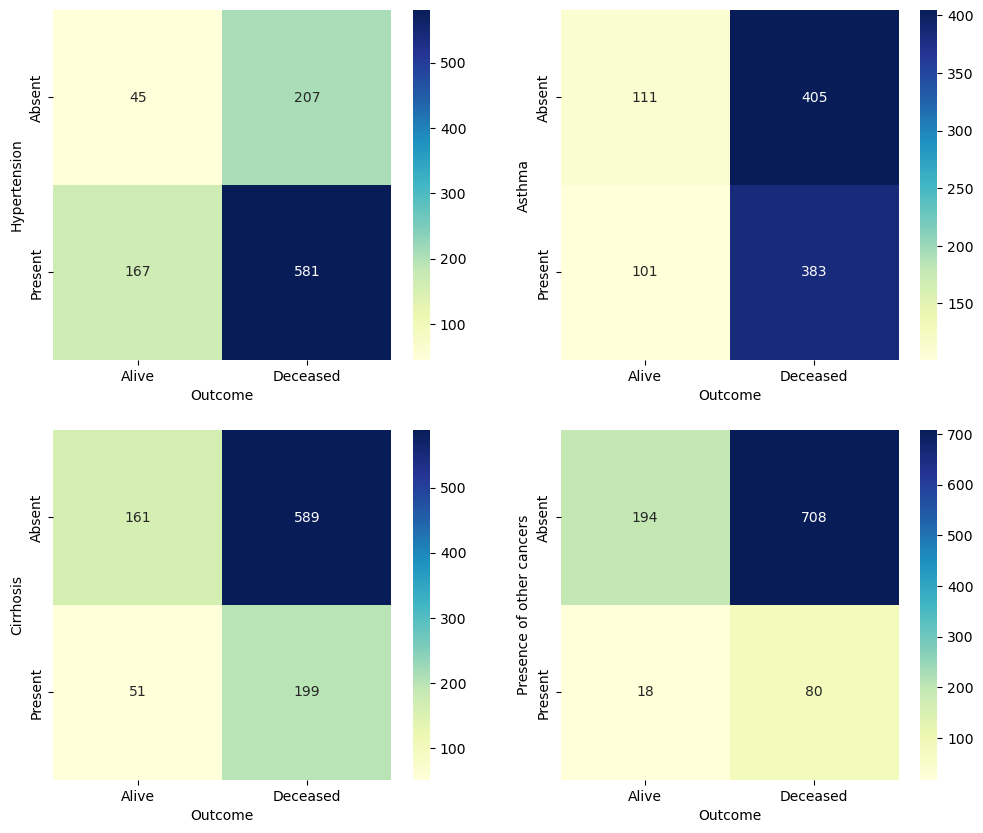

In [10]:
fig, axes = plt.subplots(ncols=2, nrows = 2, figsize=(12, 10))
cross = pd.crosstab(plot_data["Hypertension"], plot_data["Outcome"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[0,0])
cross = pd.crosstab(plot_data["Asthma"], plot_data["Outcome"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[0,1])
cross = pd.crosstab(plot_data["Cirrhosis"], plot_data["Outcome"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[1,0])
cross = pd.crosstab(plot_data["Presence of other cancers"], plot_data["Outcome"])
sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", ax = axes[1,1])
plt.show()

## Count map interpretation

### Hypertension
- Much higher proportion of patients with hypertension die from lung cancer. More than double than when hypertension is absent

### Asthma
- no significan difference between deaths with or without cancer, suggests there is little contribution to outcome

### Cirhosis
- interestingly there is a much higher proportion of deaths which are present in the absents of cirrhosis
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8179749/ - suggests no significant difference between survival with or without cirrhosis 

### Other cancers
- much higher proportion of deaths in those without other cancers,
- higher survival without other cancers



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype          
---  ------                                --------------  -----          
 0   id                                    1000 non-null   int64          
 1   age                                   1000 non-null   float64        
 2   Gender                                1000 non-null   object         
 3   country                               1000 non-null   object         
 4   diagnosis_date                        1000 non-null   datetime64[ns] 
 5   Cancer stage                          1000 non-null   object         
 6   beginning_of_treatment_date           1000 non-null   datetime64[ns] 
 7   family_history                        1000 non-null   object         
 8   smoking_status                        1000 non-null   object         
 9   bmi                                   1000 non-null   float64   

## Chi- Squared _TEST DATA


In [27]:
cross_hy = pd.crosstab(plot_data["Hypertension"], plot_data["Outcome"])

cross_as = pd.crosstab(plot_data["Asthma"], plot_data["Outcome"])

cross_ci = pd.crosstab(plot_data["Cirrhosis"], plot_data["Outcome"])

cross_oc = pd.crosstab(plot_data["Presence of other cancers"], plot_data["Outcome"])

In [28]:
from scipy.stats import chi2_contingency

In [60]:
chi2, p, dof, expected = chi2_contingency(cross_hy)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

In [61]:
chi2, p, dof, expected = chi2_contingency(cross_as)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

In [62]:
chi2, p, dof, expected = chi2_contingency(cross_ci)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

In [63]:
chi2, p, dof, expected = chi2_contingency(cross_oc)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

### Chi- Squared LARGE DATASET



In [36]:
edata_large = pd.read_csv("C:\\Users\\amaia\\Downloads\\ML project\\lung_cancer_mortality_data_large_v2.csv")

In [37]:

cross_hyl = pd.crosstab(edata_large["hypertension"], edata_large["survived"])

cross_asl = pd.crosstab(edata_large["asthma"], edata_large["survived"])

cross_cil = pd.crosstab(edata_large["cirrhosis"], edata_large["survived"])

cross_ocl = pd.crosstab(edata_large["other_cancer"], edata_large["survived"])

In [64]:
chi2, p, dof, expected = chi2_contingency(cross_hyl)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

In [65]:
chi2, p, dof, expected = chi2_contingency(cross_asl)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

In [66]:
chi2, p, dof, expected = chi2_contingency(cross_cil)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

In [59]:
chi2, p, dof, expected = chi2_contingency(cross_ocl)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

In [42]:
sample_large = edata_large.sample(frac =.25, random_state = 42)

In [44]:

cross_hyl25 = pd.crosstab(sample_large["hypertension"], sample_large["survived"])

cross_asl25 = pd.crosstab(sample_large["asthma"], sample_large["survived"])

cross_cil25 = pd.crosstab(sample_large["cirrhosis"], sample_large["survived"])

cross_ocl25 = pd.crosstab(sample_large["other_cancer"], sample_large["survived"])

In [57]:
chi2, p, dof, expected = chi2_contingency(cross_hyl25)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

In [58]:
chi2, p, dof, expected = chi2_contingency(cross_asl25)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(f"Degrees of Freedom: {dof}")
#print("Expected Frequencies:")
#print(expected)

In [56]:
chi2, p, dof, expected = chi2_contingency(cross_cil25)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(expected)

In [55]:
chi2, p, dof, expected = chi2_contingency(cross_ocl25)

#print(f"Chi-Square Statistic: {chi2}")
#print(f"P-Value: {p}")
#print(expected)